Please upload your smart_grid_dataset.csv file:


Saving smart_grid_dataset.csv to smart_grid_dataset (2).csv
Dataset loaded successfully! Shape: (1034, 21)

First 5 rows of the dataset:
             timestamp meter_id location_id  energy_consumption_kWh  \
0  2025-01-01 00:00:00  meter_0       rural                   38.51   
1  2025-01-01 01:00:00  meter_1       urban                    4.82   
2  2025-01-01 02:00:00  meter_2       rural                   25.55   
3  2025-01-01 03:00:00  meter_3       rural                   46.63   
4  2025-01-01 04:00:00  meter_4       urban                   16.37   

   voltage_V  current_A  power_factor  frequency_Hz  temperature_C  \
0     224.07      25.03          0.94         49.77           19.3   
1     224.93       0.30          0.88         50.21           28.7   
2     239.51      17.49          0.75         49.31           27.7   
3     234.25      11.79          0.71         50.08           23.3   
4     238.77      44.96          0.81         49.51           11.2   

   humidity_per

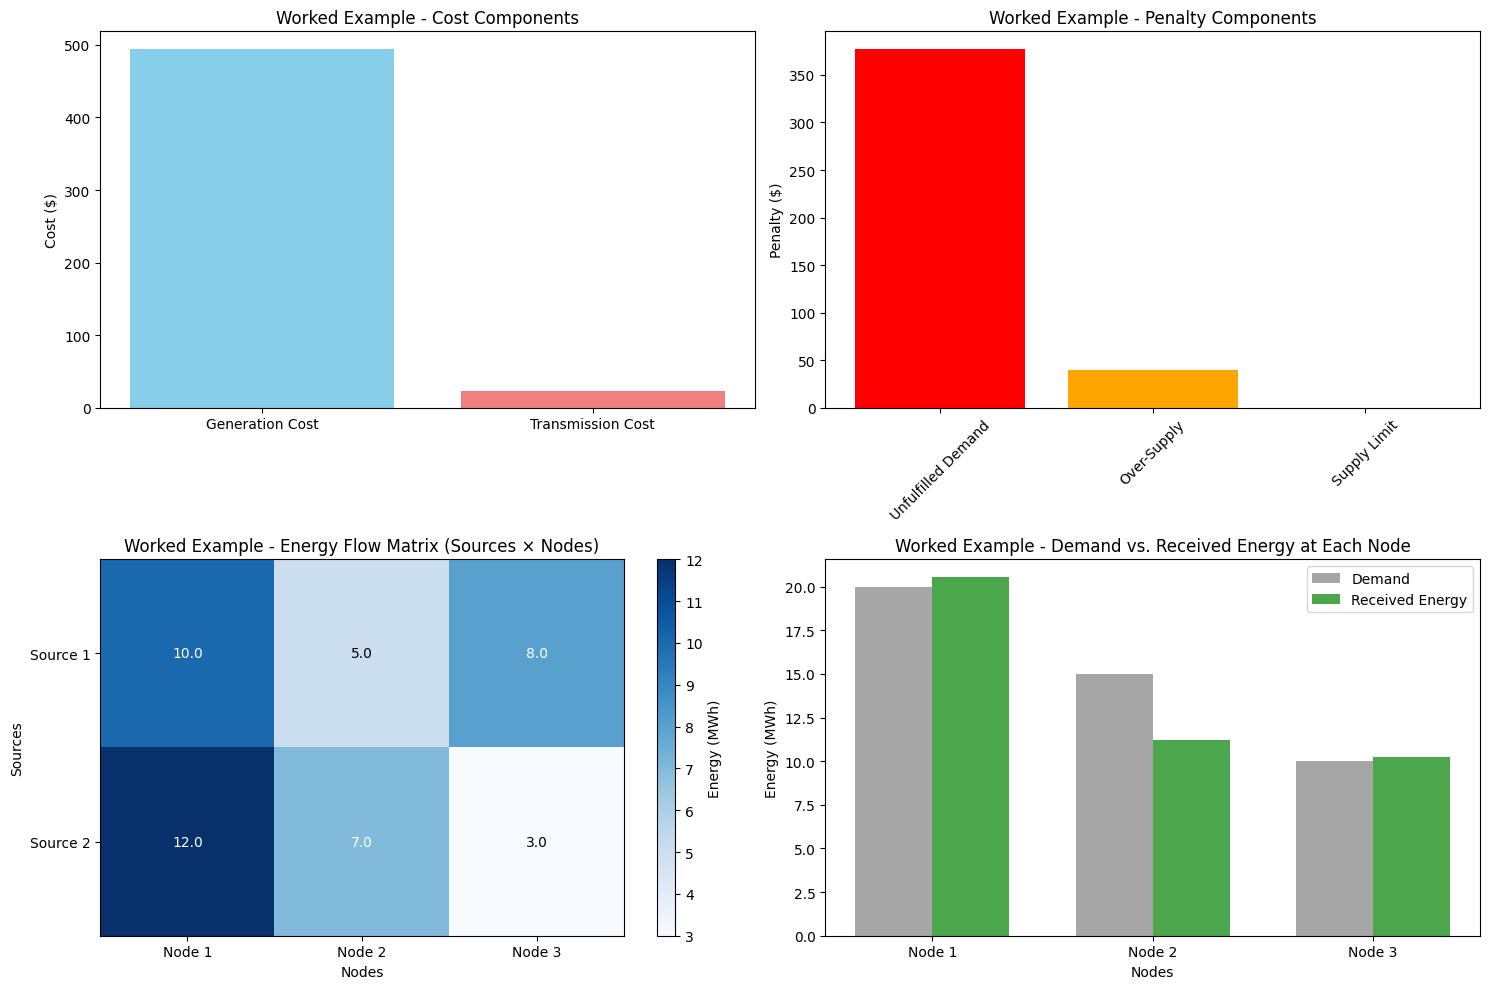

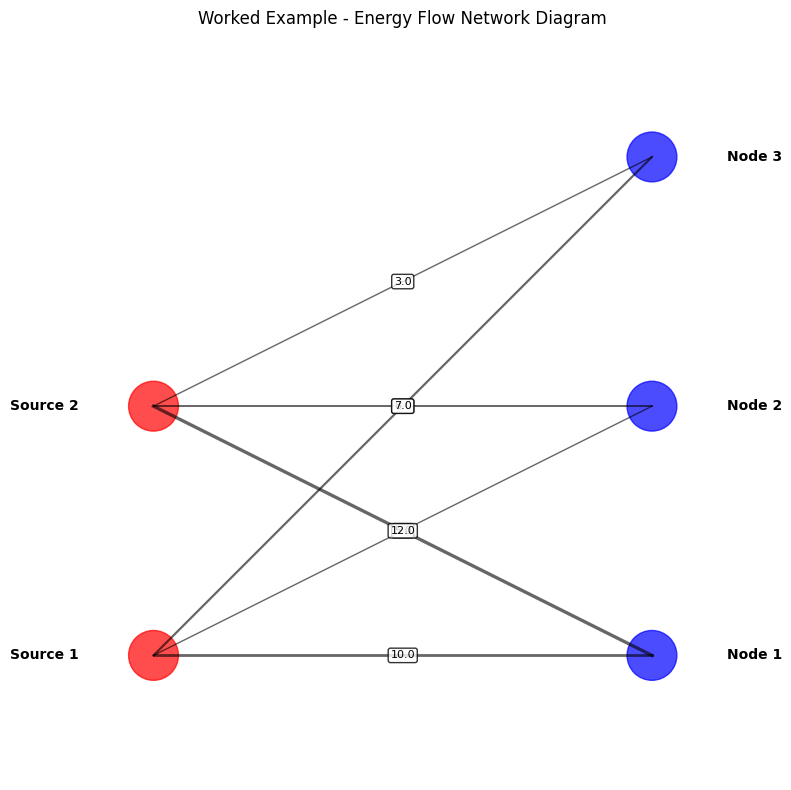


=== Question 3: Parallelization Strategy and Algorithm Implementation ===
No data found for timestamp 2025-01-01 00:00:00. Using first available timestamp.

--- GA Problem Parameters from Dataset ---
Number of Sources: 3
Number of Nodes: 10
Selected Timestamp: 2025-01-01 00:00:00
Selected Meters (Nodes): ['meter_0', 'Node_2', 'Node_3', 'Node_4', 'Node_5', 'Node_6', 'Node_7', 'Node_8', 'Node_9', 'Node_10']
Demand (kWh): [12.36 12.36 12.36 12.36 12.36 12.36 12.36 12.36 12.36 12.36]
Source Capacities (kWh): [86.52 74.16 98.88]

--- Running Serial Genetic Algorithm ---
Starting Serial Genetic Algorithm...
Generation 0/100, Best Fitness: 88810.11
Generation 20/100, Best Fitness: 14399.75
Generation 40/100, Best Fitness: 12305.41
Generation 60/100, Best Fitness: 11608.46
Generation 80/100, Best Fitness: 10732.39

--- Running Parallel Genetic Algorithm ---
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/100, Best Fitness: 80918.51
Generation 20/100, Best Fitness: 6324.5

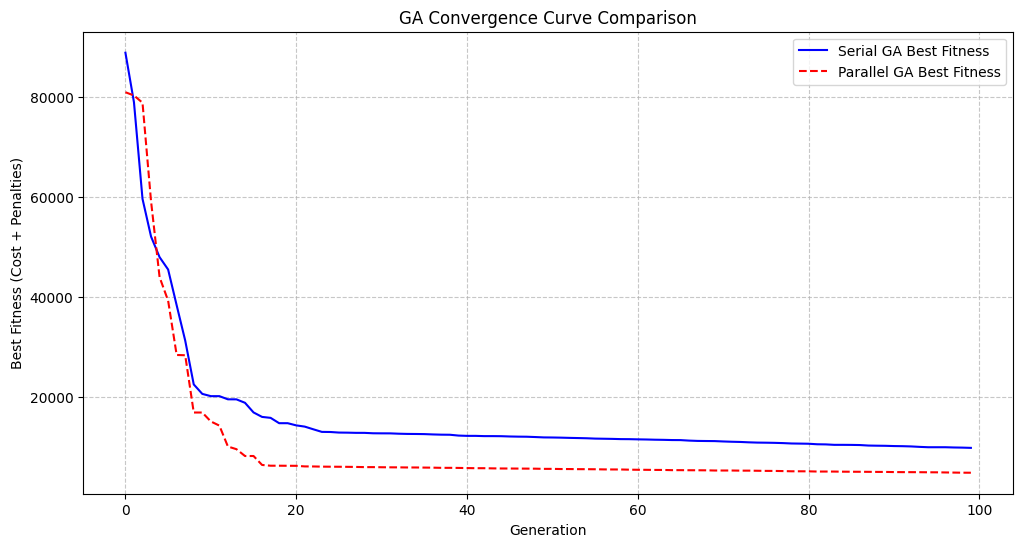

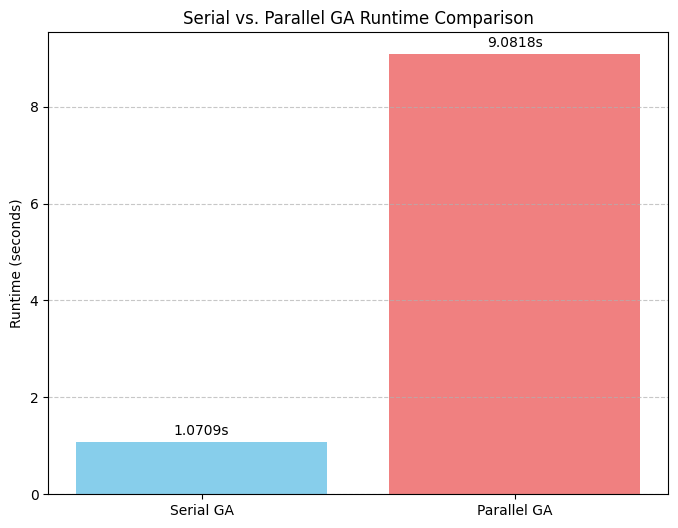

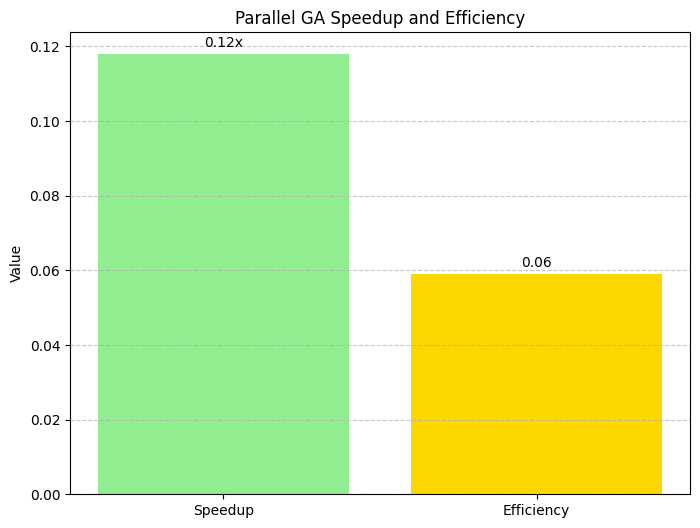

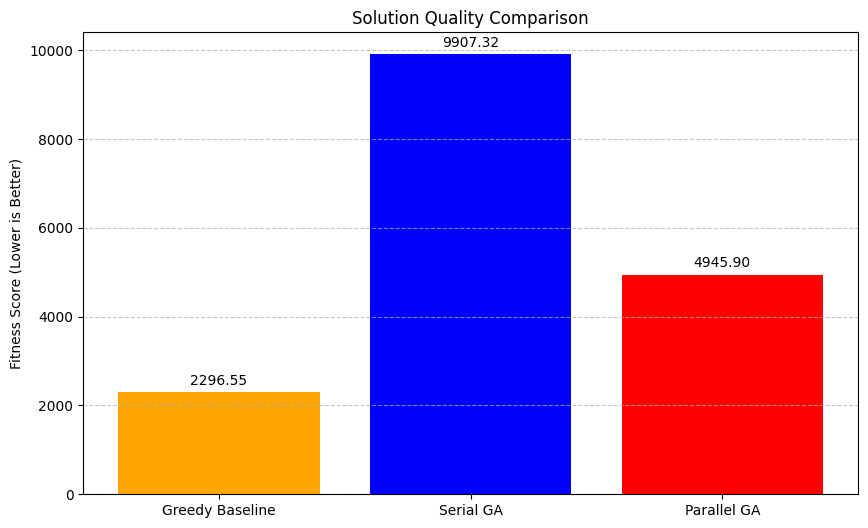


--- Parameter Trade-off Analysis ---

Testing population size: 50
Starting Serial Genetic Algorithm...
Generation 0/50, Best Fitness: 82125.49
Generation 20/50, Best Fitness: 30136.48
Generation 40/50, Best Fitness: 29075.15
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/50, Best Fitness: 101564.73
Generation 20/50, Best Fitness: 10119.27
Generation 40/50, Best Fitness: 9289.86

Testing population size: 100
Starting Serial Genetic Algorithm...
Generation 0/50, Best Fitness: 85175.81
Generation 20/50, Best Fitness: 11013.41
Generation 40/50, Best Fitness: 9320.13
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/50, Best Fitness: 80898.43
Generation 20/50, Best Fitness: 7831.94
Generation 40/50, Best Fitness: 7059.66

Testing population size: 200
Starting Serial Genetic Algorithm...
Generation 0/50, Best Fitness: 79378.52
Generation 20/50, Best Fitness: 3636.44
Generation 40/50, Best Fitness: 2927.36
Starting Parallel Genetic Algorithm using 2

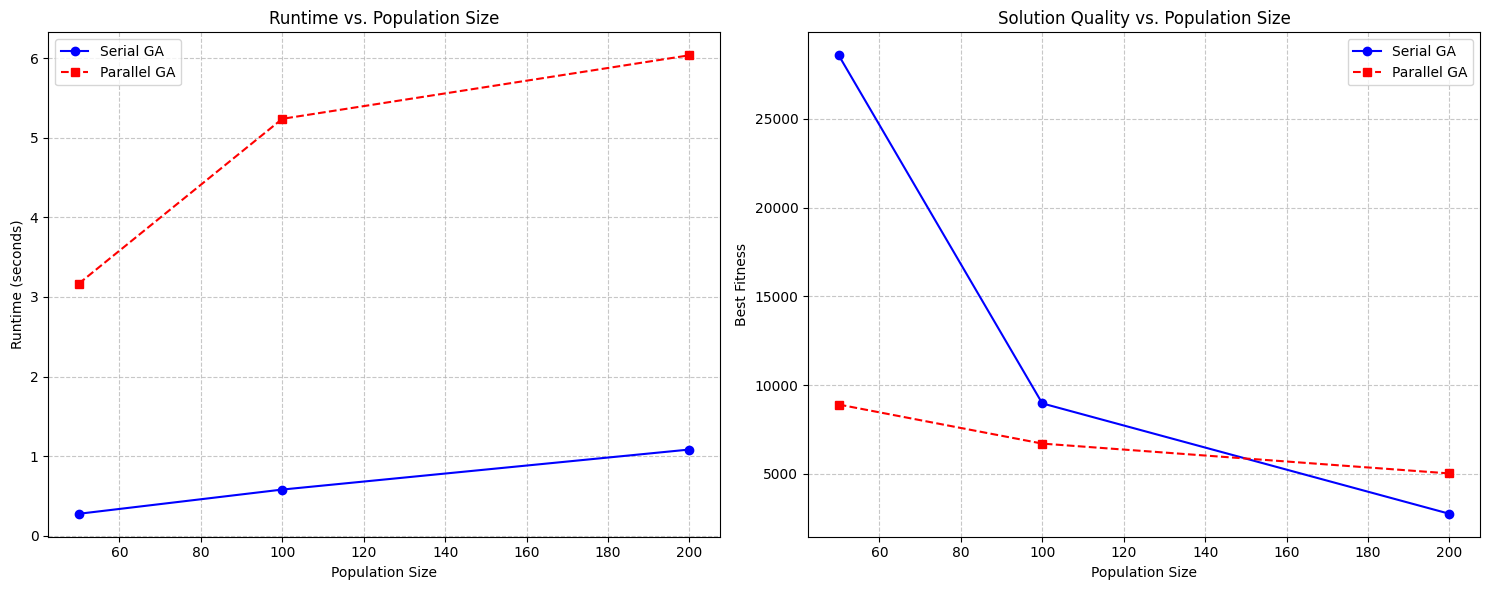


Population Size Trade-off Results:
Pop Size 50: Serial Time=0.2756s, Parallel Time=3.1659s, Serial Fitness=28592.07, Parallel Fitness=8900.06
Pop Size 100: Serial Time=0.5800s, Parallel Time=5.2367s, Serial Fitness=8963.48, Parallel Fitness=6696.32
Pop Size 200: Serial Time=1.0828s, Parallel Time=6.0352s, Serial Fitness=2738.65, Parallel Fitness=5014.41

Testing mutation rate: 0.01
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/50, Best Fitness: 84973.66
Generation 20/50, Best Fitness: 5100.03
Generation 40/50, Best Fitness: 4873.39

Testing mutation rate: 0.05
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/50, Best Fitness: 73071.02
Generation 20/50, Best Fitness: 8426.18
Generation 40/50, Best Fitness: 7171.92

Testing mutation rate: 0.1
Starting Parallel Genetic Algorithm using 2 processes...
Generation 0/50, Best Fitness: 82037.22
Generation 20/50, Best Fitness: 8825.22
Generation 40/50, Best Fitness: 7898.31


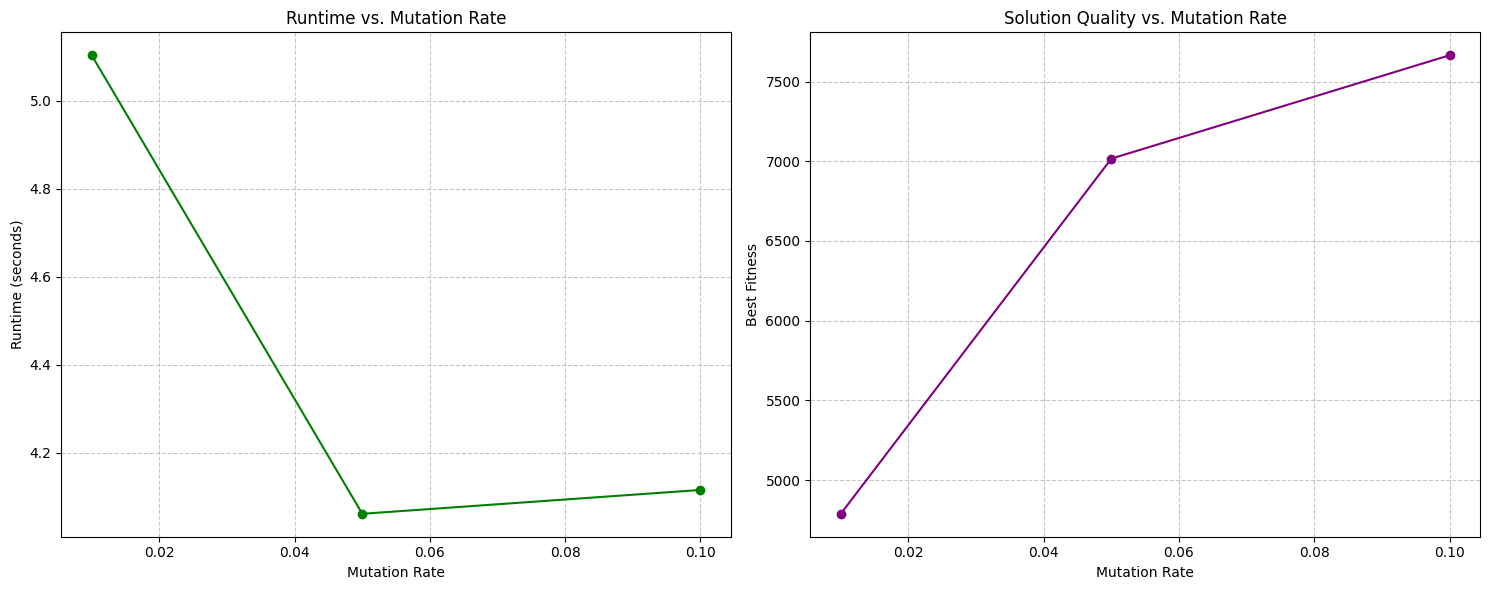


Mutation Rate Trade-off Results:
Mut Rate 0.01: Time=5.1036s, Fitness=4788.35
Mut Rate 0.05: Time=4.0617s, Fitness=7016.64
Mut Rate 0.1: Time=4.1158s, Fitness=7665.22

--- Detailed Breakdown for Best Solutions ---

Serial GA Best Solution:
Generation Cost: $2709.51
Transmission Cost: $108.75
Total Cost: $2818.25
Unfulfilled Demand Penalty: $138.91
Over-Supply Penalty: $3912.31
Supply Limit Penalty: $3007.38
Total Penalty: $7058.60
Final Fitness: $9876.85

Parallel GA Best Solution:
Generation Cost: $2317.20
Transmission Cost: $94.46
Total Cost: $2411.66
Unfulfilled Demand Penalty: $0.00
Over-Supply Penalty: $2521.84
Supply Limit Penalty: $0.00
Total Penalty: $2521.84
Final Fitness: $4933.50


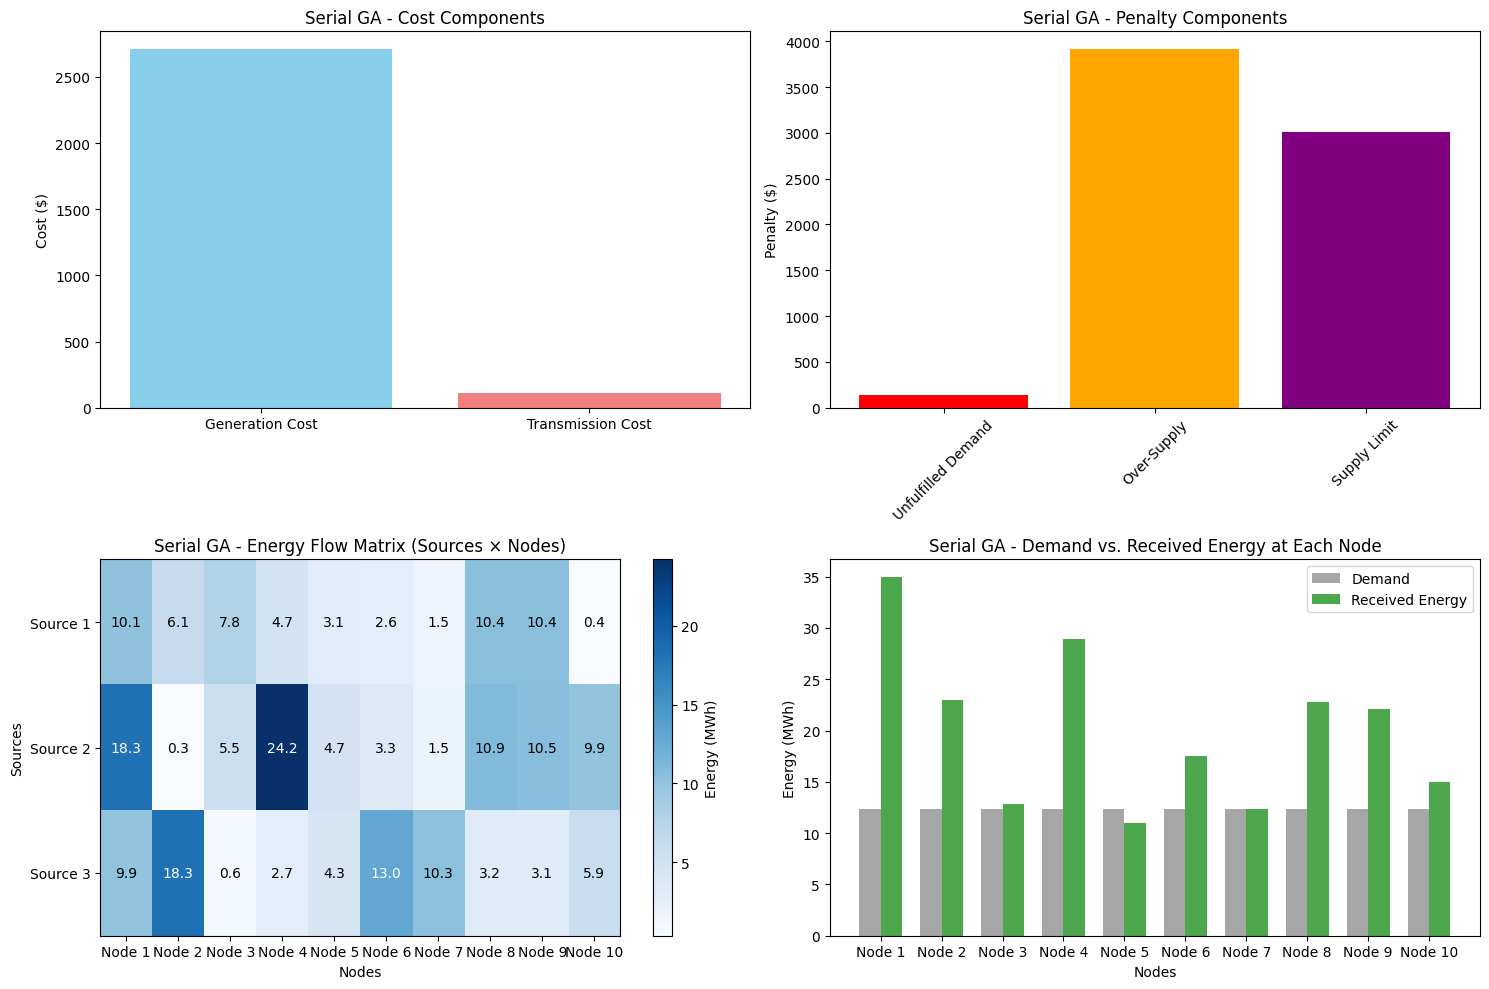

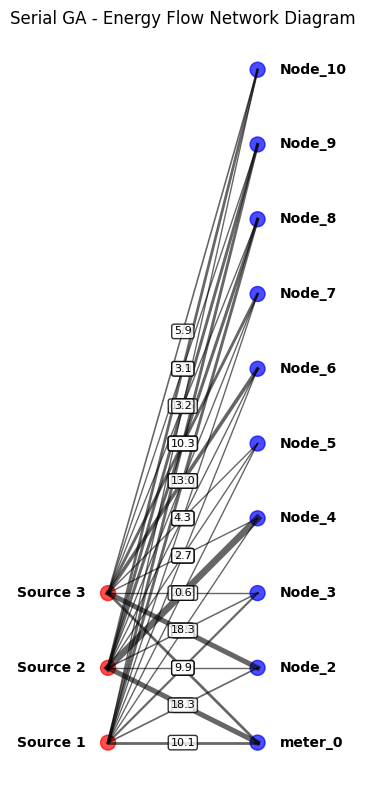

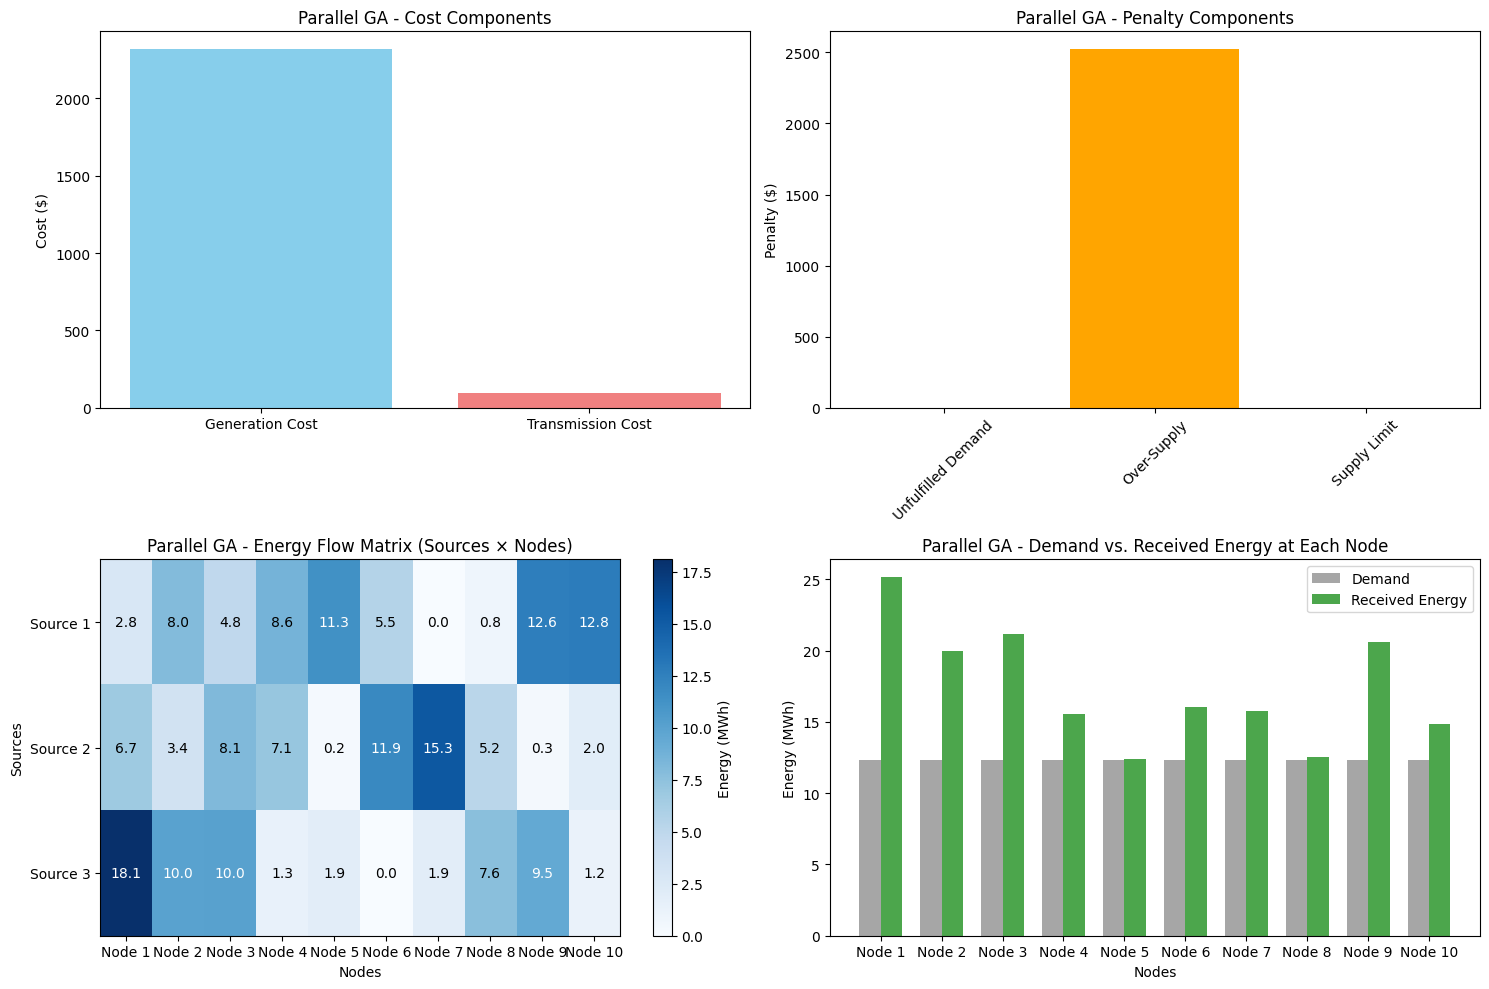

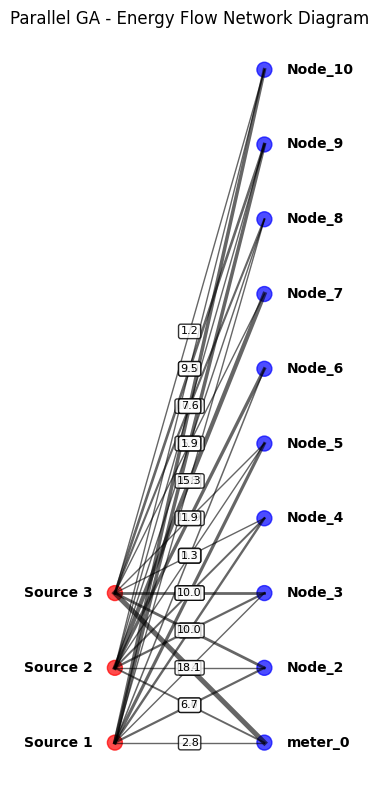


=== Assignment Implementation Complete ===


In [ ]:
# Smart Grid Energy Distribution Optimization using Genetic Algorithms and Parallel Computing
# ITS66604 - Machine Learning and Parallel Computing - Group Assignment

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from joblib import Parallel, delayed
import os
import io

# For Google Colab file upload (optional)
try:
    from google.colab import files
    COLAB_ENV = True
except ImportError:
    print("google.colab not found. Running in a local environment.")
    COLAB_ENV = False
    files = None

# Question 2: Chromosome Encoding and Fitness Function Design

# Load the smart grid dataset
def load_smart_grid_dataset():
    """Load the smart grid dataset from file or user upload."""
    if COLAB_ENV:
        print("Please upload your smart_grid_dataset.csv file:")
        uploaded = files.upload()
        if not uploaded:
            print("No file uploaded.")
            return None
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print(f"Dataset loaded successfully! Shape: {df.shape}")
    else:
        # Try to load from local directory
        try:
            df = pd.read_csv("smart_grid_dataset.csv")
            print(f"Dataset loaded successfully from local file! Shape: {df.shape}")
        except FileNotFoundError:
            print("smart_grid_dataset.csv not found. Please ensure it's in the same directory.")
            return None
    return df

# Load dataset
df_smart_grid = load_smart_grid_dataset()
if df_smart_grid is not None:
    print("\nFirst 5 rows of the dataset:")
    print(df_smart_grid.head())


# Define the fitness function for energy allocation
def calculate_fitness(chromosome, num_sources, num_nodes, cost_source,
                      transmission_cost_per_unit, loss_percent, demand,
                      capacity_source, penalty_unfulfilled, penalty_oversupply,
                      penalty_supply_limit):
    """
    Calculate the fitness score for a given chromosome representing energy allocation.

    Parameters:
    -----------
    chromosome : numpy.ndarray
        Flattened array representing energy flows from sources to nodes
    num_sources : int
        Number of energy sources
    num_nodes : int
        Number of nodes (consumers)
    cost_source : numpy.ndarray
        Cost per unit of energy from each source
    transmission_cost_per_unit : float
        Cost per unit of energy for transmission
    loss_percent : numpy.ndarray
        Percentage of energy lost during transmission (sources x nodes)
    demand : numpy.ndarray
        Energy demand at each node
    capacity_source : numpy.ndarray
        Maximum energy capacity of each source
    penalty_unfulfilled : float
        Penalty cost per unit of unfulfilled demand
    penalty_oversupply : float
        Penalty cost per unit of over-supplied energy
    penalty_supply_limit : float
        Penalty cost per unit of exceeding source capacity

    Returns:
    --------
    float
        Total fitness score (to be minimized)
    """
    # Reshape chromosome to easily access energy flows from source to node
    # energy_flow[s, n] represents energy from source s to node n
    energy_flow = chromosome.reshape(num_sources, num_nodes)

    # 1. Calculate Generation Cost
    # Total energy supplied by each source
    E_s_total = np.sum(energy_flow, axis=1)  # Sum across nodes for each source
    generation_cost = np.sum(cost_source * E_s_total)

    # 2. Calculate Transmission Cost
    transmission_cost = np.sum(transmission_cost_per_unit * energy_flow)

    # Total Cost
    total_cost = generation_cost + transmission_cost

    # Calculate energy received at each node, considering loss
    # E_n_received[n] is total energy received at node n
    E_n_received = np.sum(energy_flow * (1 - loss_percent), axis=0)  # Sum across sources for each node

    # 3. Calculate Unfulfilled Demand Penalty
    unfulfilled_demand = np.maximum(0, demand - E_n_received)
    unfulfilled_demand_penalty = np.sum(penalty_unfulfilled * unfulfilled_demand)

    # 4. Calculate Over-Supply Penalty
    oversupply = np.maximum(0, E_n_received - demand)
    oversupply_penalty = np.sum(penalty_oversupply * oversupply)

    # 5. Calculate Supply Limit Penalty
    supply_limit_violation = np.maximum(0, E_s_total - capacity_source)
    supply_limit_penalty = np.sum(penalty_supply_limit * supply_limit_violation)

    # Total Penalty
    total_penalty = unfulfilled_demand_penalty + oversupply_penalty + supply_limit_penalty

    # Total Fitness (to be minimized)
    fitness = total_cost + total_penalty

    return fitness

# Detailed fitness breakdown function
def detailed_fitness_breakdown(chromosome, num_sources, num_nodes, cost_source,
                                transmission_cost_per_unit, loss_percent, demand,
                                capacity_source, penalty_unfulfilled, penalty_oversupply,
                                penalty_supply_limit):
    """
    Calculate and return detailed breakdown of fitness components.

    Returns:
    --------
    dict
        Dictionary containing detailed breakdown of all fitness components
    """
    energy_flow = chromosome.reshape(num_sources, num_nodes)

    # Calculate components
    E_s_total = np.sum(energy_flow, axis=1)
    generation_cost = np.sum(cost_source * E_s_total)
    transmission_cost = np.sum(transmission_cost_per_unit * energy_flow)
    total_cost = generation_cost + transmission_cost

    E_n_received = np.sum(energy_flow * (1 - loss_percent), axis=0)
    unfulfilled_demand = np.maximum(0, demand - E_n_received)
    unfulfilled_demand_penalty = np.sum(penalty_unfulfilled * unfulfilled_demand)
    oversupply = np.maximum(0, E_n_received - demand)
    oversupply_penalty = np.sum(penalty_oversupply * oversupply)
    supply_limit_violation = np.maximum(0, E_s_total - capacity_source)
    supply_limit_penalty = np.sum(penalty_supply_limit * supply_limit_violation)
    total_penalty = unfulfilled_demand_penalty + oversupply_penalty + supply_limit_penalty

    fitness = total_cost + total_penalty

    return {
        "energy_flow": energy_flow,
        "E_s_total": E_s_total,
        "E_n_received": E_n_received,
        "generation_cost": generation_cost,
        "transmission_cost": transmission_cost,
        "total_cost": total_cost,
        "unfulfilled_demand": unfulfilled_demand,
        "unfulfilled_demand_penalty": unfulfilled_demand_penalty,
        "oversupply": oversupply,
        "oversupply_penalty": oversupply_penalty,
        "supply_limit_violation": supply_limit_violation,
        "supply_limit_penalty": supply_limit_penalty,
        "total_penalty": total_penalty,
        "fitness": fitness,
        "demand": demand # Include demand in the breakdown dict
    }

# Question 2 Worked Example
print("=== Question 2: Worked Example Calculation ===")

# Define parameters for the example
num_sources = 2
num_nodes = 3
cost_source = np.array([10, 12])  # $/MWh
transmission_cost_per_unit = 0.5  # $/MWh
loss_percent = np.array([[0.05, 0.07, 0.06], [0.08, 0.06, 0.09]])  # Loss percentages
demand = np.array([20, 15, 10])  # MWh
capacity_source = np.array([30, 25])  # MWh
penalty_unfulfilled = 100  # Penalty per MWh
penalty_oversupply = 50   # Penalty per MWh
penalty_supply_limit = 200  # Penalty per MWh

# Sample chromosome: [Source1->Node1, Source1->Node2, Source1->Node3, Source2->Node1, Source2->Node2, Source2->Node3]
sample_chromosome = np.array([10.0, 5.0, 8.0, 12.0, 7.0, 3.0])

# Calculate fitness using the function
calculated_fitness = calculate_fitness(
    sample_chromosome,
    num_sources,
    num_nodes,
    cost_source,
    transmission_cost_per_unit,
    loss_percent,
    demand,
    capacity_source,
    penalty_unfulfilled,
    penalty_oversupply,
    penalty_supply_limit
)

print(f"Sample Chromosome: {sample_chromosome}")
print(f"Calculated Fitness: ${calculated_fitness:.2f}")

# Get detailed breakdown for visualization
breakdown = detailed_fitness_breakdown(
    sample_chromosome,
    num_sources,
    num_nodes,
    cost_source,
    transmission_cost_per_unit,
    loss_percent,
    demand,
    capacity_source,
    penalty_unfulfilled,
    penalty_oversupply,
    penalty_supply_limit
)

print("\nDetailed Breakdown:")
print(f"Energy Flow Matrix:\n{breakdown['energy_flow']}")
print(f"Total Energy Supplied by Sources: {breakdown['E_s_total']}")
print(f"Energy Received at Nodes: {breakdown['E_n_received']}")
print(f"Generation Cost: ${breakdown['generation_cost']:.2f}")
print(f"Transmission Cost: ${breakdown['transmission_cost']:.2f}")
print(f"Total Cost: ${breakdown['total_cost']:.2f}")
print(f"Unfulfilled Demand: {breakdown['unfulfilled_demand']}")
print(f"Unfulfilled Demand Penalty: ${breakdown['unfulfilled_demand_penalty']:.2f}")
print(f"Oversupply: {breakdown['oversupply']}")
print(f"Oversupply Penalty: ${breakdown['oversupply_penalty']:.2f}")
print(f"Supply Limit Violation: {breakdown['supply_limit_violation']}")
print(f"Supply Limit Penalty: ${breakdown['supply_limit_penalty']:.2f}")
print(f"Total Penalty: ${breakdown['total_penalty']:.2f}")
print(f"Final Fitness: ${breakdown['fitness']:.2f}")


# Visualization Functions for Question 2
def plot_fitness_breakdown(breakdown_dict, title_prefix=""):
    """Plot breakdown of fitness components."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Cost components
    costs = [breakdown_dict["generation_cost"], breakdown_dict["transmission_cost"]]
    cost_labels = ["Generation Cost", "Transmission Cost"]
    ax1.bar(cost_labels, costs, color=["skyblue", "lightcoral"])
    ax1.set_title(f"{title_prefix}Cost Components")
    ax1.set_ylabel("Cost ($)")

    # Penalty components
    penalties = [
        breakdown_dict["unfulfilled_demand_penalty"],
        breakdown_dict["oversupply_penalty"],
        breakdown_dict["supply_limit_penalty"]
    ]
    penalty_labels = ["Unfulfilled Demand", "Over-Supply", "Supply Limit"]
    ax2.bar(penalty_labels, penalties, color=["red", "orange", "purple"])
    ax2.set_title(f"{title_prefix}Penalty Components")
    ax2.set_ylabel("Penalty ($)")
    ax2.tick_params(axis='x', rotation=45)

    # Energy flow matrix
    energy_flow = breakdown_dict["energy_flow"]
    im = ax3.imshow(energy_flow, cmap='Blues', aspect='auto')
    ax3.set_title(f"{title_prefix}Energy Flow Matrix (Sources × Nodes)")
    ax3.set_xlabel("Nodes")
    ax3.set_ylabel("Sources")
    ax3.set_xticks(range(energy_flow.shape[1]))
    ax3.set_yticks(range(energy_flow.shape[0]))
    ax3.set_xticklabels([f"Node {i+1}" for i in range(energy_flow.shape[1])])
    ax3.set_yticklabels([f"Source {i+1}" for i in range(energy_flow.shape[0])])
    plt.colorbar(im, ax=ax3, label="Energy (MWh)")

    # Add text annotations to energy flow matrix
    for i in range(energy_flow.shape[0]):
        for j in range(energy_flow.shape[1]):
            ax3.text(j, i, f"{energy_flow[i, j]:.1f}",
                    ha='center', va='center', color='white' if energy_flow[i, j] > energy_flow.max()/2 else 'black')

    # Demand vs. received energy
    num_nodes_plot = breakdown_dict["energy_flow"].shape[1] # Use the actual number of nodes in the solution
    node_labels = [f"Node {i+1}" for i in range(num_nodes_plot)]
    demand_values = breakdown_dict['demand'][:num_nodes_plot]  # Use the demand from the breakdown dict, clipped to the correct size
    received_energy = breakdown_dict["E_n_received"][:num_nodes_plot]
    x = np.arange(len(node_labels))
    width = 0.35
    rects1 = ax4.bar(x - width/2, demand_values, width, label='Demand', color='gray', alpha=0.7)
    rects2 = ax4.bar(x + width/2, received_energy, width, label='Received Energy', color='green', alpha=0.7)
    ax4.set_title(f'{title_prefix}Demand vs. Received Energy at Each Node')
    ax4.set_xlabel('Nodes')
    ax4.set_ylabel('Energy (MWh)')
    ax4.set_xticks(x)
    ax4.set_xticklabels(node_labels)
    ax4.legend()

    plt.tight_layout()
    plt.show()

def plot_energy_flow_network(breakdown_dict, selected_meters, title_prefix=""):
    """Plot energy flow network diagram."""
    energy_flow = breakdown_dict["energy_flow"]
    num_sources, num_nodes = energy_flow.shape

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Position sources and nodes
    source_positions = [(0, i) for i in range(num_sources)]
    node_positions = [(2, i) for i in range(num_nodes)]

    # Draw sources
    for i, (x, y) in enumerate(source_positions):
        circle = plt.Circle((x, y), 0.1, color='red', alpha=0.7)
        ax.add_patch(circle)
        ax.text(x-0.3, y, f"Source {i+1}", ha='right', va='center', fontweight='bold')

    # Draw nodes
    for i, (x, y) in enumerate(node_positions):
        circle = plt.Circle((x, y), 0.1, color='blue', alpha=0.7)
        ax.add_patch(circle)
        # Ensure selected_meters has enough elements for the number of nodes
        node_label = selected_meters[i] if i < len(selected_meters) else f"Node {i+1}"
        ax.text(x+0.3, y, node_label, ha='left', va='center', fontweight='bold')

    # Draw connections
    for s in range(num_sources):
        for n in range(num_nodes):
            if energy_flow[s, n] > 0:
                x1, y1 = source_positions[s]
                x2, y2 = node_positions[n]
                thickness = max(1, energy_flow[s, n] / 5)
                ax.plot([x1, x2], [y1, y2], 'k-', linewidth=thickness, alpha=0.6)
                mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
                ax.text(mid_x, mid_y, f"{energy_flow[s, n]:.1f}",
                       ha='center', va='center', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, max(num_sources, num_nodes) - 0.5)
    ax.set_aspect('equal')
    ax.set_title(f'{title_prefix}Energy Flow Network Diagram')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the results for the worked example
plot_fitness_breakdown(breakdown, "Worked Example - ")
selected_meters_example = [f"Node {i+1}" for i in range(num_nodes)]
plot_energy_flow_network(breakdown, selected_meters_example, "Worked Example - ")


# Question 3: Parallelization Strategy and Algorithm Implementation


# Genetic Algorithm Components
def tournament_selection(population, fitnesses, k=3):
    """Tournament selection for parent selection."""
    selected_parents = []
    for _ in range(len(population)):
        # Randomly select k individuals for the tournament
        tournament_indices = np.random.choice(len(population), k, replace=False)
        tournament_fitnesses = fitnesses[tournament_indices]
        # Find the index of the best individual (lowest fitness) in the tournament
        best_in_tournament_idx = tournament_indices[np.argmin(tournament_fitnesses)]
        selected_parents.append(population[best_in_tournament_idx])
    return np.array(selected_parents)

def one_point_crossover(parent1, parent2):
    """Single point crossover operation."""
    crossover_point = np.random.randint(1, len(parent1))
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return offspring1, offspring2

def gaussian_mutation(chromosome, mutation_rate, mutation_strength=0.1, min_val=0, max_val=50):
    """Gaussian mutation operation."""
    mutated_chromosome = np.copy(chromosome)
    for i in range(len(mutated_chromosome)):
        if np.random.rand() < mutation_rate:
            # Add Gaussian noise
            mutated_chromosome[i] += np.random.normal(0, mutation_strength)
            # Clip values to stay within bounds
            mutated_chromosome[i] = np.clip(mutated_chromosome[i], min_val, max_val)
    return mutated_chromosome


# Prepare problem parameters from dataset
def prepare_problem_parameters(df, selected_timestamp_str='2025-01-01 00:00:00',
                               selected_meter_locations={'rural': 1, 'urban': 1, 'suburban': 1}):
    """
    Prepare problem parameters from the dataset for a specific timestamp and meter locations.
    """
    selected_timestamp = pd.to_datetime(selected_timestamp_str)

    # Filter data for the selected timestamp
    df_time_slice = df[df['timestamp'] == selected_timestamp].copy()
    if df_time_slice.empty:
        print(f"No data found for timestamp {selected_timestamp_str}. Using first available timestamp.")
        selected_timestamp = df['timestamp'].iloc[0]
        df_time_slice = df[df['timestamp'] == selected_timestamp].copy()
        selected_timestamp_str = str(selected_timestamp)  # Update for output

    # Select meters based on location_id and count
    selected_meters_list = []
    demand_values = []
    for loc, count in selected_meter_locations.items():
        meters_in_loc = df_time_slice[df_time_slice['location_id'] == loc]['meter_id'].unique()
        if len(meters_in_loc) < count:
            print(f"Warning: Not enough meters in {loc} for count {count}. Using all available ({len(meters_in_loc)}).")
            selected_meters_list.extend(meters_in_loc.tolist())
        else:
            selected_meters_list.extend(np.random.choice(meters_in_loc, count, replace=False).tolist())

    # Ensure unique meters and sort for consistency
    selected_meters_list = sorted(list(set(selected_meters_list)))

    # Extract demand for the selected nodes
    df_selected_nodes = df_time_slice[df_time_slice['meter_id'].isin(selected_meters_list)].set_index('meter_id').loc[selected_meters_list]
    demand_values = df_selected_nodes['predicted_demand_kWh'].values

    # Define problem parameters
    num_sources = 3  # Minimum 3 sources as per assignment
    num_nodes = max(10, len(selected_meters_list))  # Minimum 10 nodes as per assignment

    # If we don't have enough nodes, pad with average demands
    if len(demand_values) < num_nodes:
        avg_demand = np.mean(demand_values) if len(demand_values) > 0 else 50
        padded_demands = list(demand_values)
        while len(padded_demands) < num_nodes:
            padded_demands.append(avg_demand)
        demand_values = np.array(padded_demands)
        # Extend selected meters list with dummy names
        while len(selected_meters_list) < num_nodes:
            selected_meters_list.append(f"Node_{len(selected_meters_list)+1}")

    # Hypothetical costs and capacities
    cost_source = np.array([10, 12, 15])  # Cost per kWh for Sources 1, 2, 3
    transmission_cost_per_unit = 0.5  # Transmission cost per kWh

    # Loss percentage matrix
    loss_percent = np.random.uniform(0.05, 0.10, size=(num_sources, num_nodes))

    demand = demand_values[:num_nodes]  # Ensure correct size
    capacity_source = np.array([np.sum(demand) * 0.7, np.sum(demand) * 0.6, np.sum(demand) * 0.8])  # Source capacities

    # Penalty parameters
    penalty_unfulfilled = 100
    penalty_oversupply = 50
    penalty_supply_limit = 200

    parameters = {
        'num_sources': num_sources,
        'num_nodes': num_nodes,
        'cost_source': cost_source,
        'transmission_cost_per_unit': transmission_cost_per_unit,
        'loss_percent': loss_percent,
        'demand': demand,
        'capacity_source': capacity_source,
        'penalty_unfulfilled': penalty_unfulfilled,
        'penalty_oversupply': penalty_oversupply,
        'penalty_supply_limit': penalty_supply_limit,
        'selected_timestamp': selected_timestamp_str,
        'selected_meters': selected_meters_list[:num_nodes],  # Ensure correct size
        'filtered_data': df_selected_nodes
    }

    return parameters

# Serial Genetic Algorithm Implementation
def genetic_algorithm_serial(population_size, chromosome_length, num_generations,
                             mutation_rate, num_sources, num_nodes, cost_source,
                             transmission_cost_per_unit, loss_percent, demand,
                             capacity_source, penalty_unfulfilled, penalty_oversupply,
                             penalty_supply_limit, max_energy_gene=50):
    """
    Serial implementation of the Genetic Algorithm.
    """
    # 1. Initialization
    population = np.random.uniform(0, max_energy_gene, (population_size, chromosome_length))
    best_fitness_history = []

    print("Starting Serial Genetic Algorithm...")

    for generation in range(num_generations):
        # 2. Fitness Evaluation (SERIAL)
        fitnesses = np.array([calculate_fitness(ind, num_sources, num_nodes, cost_source,
                                                  transmission_cost_per_unit, loss_percent, demand,
                                                  capacity_source, penalty_unfulfilled, penalty_oversupply,
                                                  penalty_supply_limit) for ind in population])

        # Track the best fitness in this generation
        best_gen_fitness = np.min(fitnesses)
        best_fitness_history.append(best_gen_fitness)

        # Find the best chromosome in the current population
        best_idx = np.argmin(fitnesses)
        current_best_chromosome = population[best_idx]

        # Print progress
        if generation % 20 == 0:
            print(f"Generation {generation}/{num_generations}, Best Fitness: {best_gen_fitness:.2f}")

        # 3. Selection
        parents = tournament_selection(population, fitnesses)

        # 4. Crossover and 5. Mutation to create new population
        next_population = []

        # Elitism: Keep the best chromosome from the current generation
        next_population.append(current_best_chromosome)

        for i in range(0, population_size - 1, 2):  # -1 because of elitism
            parent1 = parents[i]
            parent2 = parents[i+1] if i+1 < population_size else parents[0]  # Handle odd population size
            offspring1, offspring2 = one_point_crossover(parent1, parent2)
            offspring1 = gaussian_mutation(offspring1, mutation_rate, max_val=max_energy_gene)
            offspring2 = gaussian_mutation(offspring2, mutation_rate, max_val=max_energy_gene)
            next_population.extend([offspring1, offspring2])

        # 6. New Population
        population = np.array(next_population[:population_size])  # Ensure population size is maintained

    # Final fitness evaluation for the very last population
    fitnesses = np.array([calculate_fitness(ind, num_sources, num_nodes, cost_source,
                                              transmission_cost_per_unit, loss_percent, demand,
                                              capacity_source, penalty_unfulfilled, penalty_oversupply,
                                              penalty_supply_limit) for ind in population])
    best_idx = np.argmin(fitnesses)
    best_chromosome = population[best_idx]

    return best_chromosome, best_fitness_history


# Parallel Genetic Algorithm Implementation using Joblib
def genetic_algorithm_parallel(population_size, chromosome_length, num_generations,
                               mutation_rate, num_sources, num_nodes, cost_source,
                               transmission_cost_per_unit, loss_percent, demand,
                               capacity_source, penalty_unfulfilled, penalty_oversupply,
                               penalty_supply_limit, max_energy_gene=50):
    """
    Parallel implementation of the Genetic Algorithm using Joblib.
    """
    # 1. Initialization
    population = np.random.uniform(0, max_energy_gene, (population_size, chromosome_length))
    best_fitness_history = []

    # Determine number of processes
    num_processes = os.cpu_count()
    print(f"Starting Parallel Genetic Algorithm using {num_processes} processes...")

    for generation in range(num_generations):
        # 2. Fitness Evaluation (PARALLEL)
        fitnesses = Parallel(n_jobs=num_processes)(
            delayed(calculate_fitness)(
                ind, num_sources, num_nodes, cost_source,
                transmission_cost_per_unit, loss_percent, demand,
                capacity_source, penalty_unfulfilled, penalty_oversupply,
                penalty_supply_limit
            ) for ind in population
        )
        fitnesses = np.array(fitnesses)

        # Track the best fitness in this generation
        best_gen_fitness = np.min(fitnesses)
        best_fitness_history.append(best_gen_fitness)

        # Find the best chromosome in the current population
        best_idx = np.argmin(fitnesses)
        current_best_chromosome = population[best_idx]

        # Print progress
        if generation % 20 == 0:
            print(f"Generation {generation}/{num_generations}, Best Fitness: {best_gen_fitness:.2f}")

        # 3. Selection (SERIAL - typically fast)
        parents = tournament_selection(population, fitnesses)

        # 4. Crossover and 5. Mutation to create new population (CAN BE PARALLELIZED)
        next_population = []

        # Elitism: Keep the best chromosome from the current generation
        next_population.append(current_best_chromosome)

        # Prepare parent pairs for parallel processing
        parent_pairs = []
        for i in range(0, population_size - 1, 2):  # -1 because of elitism
            parent1 = parents[i]
            parent2 = parents[i+1] if i+1 < population_size else parents[0]
            parent_pairs.append((parent1, parent2))

        # Parallel crossover and mutation
        def crossover_and_mutate_pair(pair):
            p1, p2 = pair
            offspring1, offspring2 = one_point_crossover(p1, p2)
            offspring1 = gaussian_mutation(offspring1, mutation_rate, max_val=max_energy_gene)
            offspring2 = gaussian_mutation(offspring2, mutation_rate, max_val=max_energy_gene)
            return offspring1, offspring2

        results = Parallel(n_jobs=num_processes)(
            delayed(crossover_and_mutate_pair)(pair) for pair in parent_pairs
        )

        # Collect offspring
        for offspring1, offspring2 in results:
            next_population.append(offspring1)
            if len(next_population) < population_size:
                next_population.append(offspring2)

        # 6. New Population
        population = np.array(next_population[:population_size])  # Ensure population size is maintained

    # Final fitness evaluation for the very last population
    fitnesses = Parallel(n_jobs=num_processes)(
        delayed(calculate_fitness)(
            ind, num_sources, num_nodes, cost_source,
            transmission_cost_per_unit, loss_percent, demand,
            capacity_source, penalty_unfulfilled, penalty_oversupply,
            penalty_supply_limit
        ) for ind in population
    )
    fitnesses = np.array(fitnesses)

    best_idx = np.argmin(fitnesses)
    best_chromosome = population[best_idx]

    return best_chromosome, best_fitness_history


# Run GA implementations and compare performance
if df_smart_grid is not None:
    print("\n=== Question 3: Parallelization Strategy and Algorithm Implementation ===")

    # Prepare parameters using the loaded dataset
    ga_params = prepare_problem_parameters(df_smart_grid,
                                         selected_timestamp_str='2025-01-01 00:00:00',
                                         selected_meter_locations={'rural': 4, 'urban': 4, 'suburban': 2})  # Ensuring at least 10 nodes

    print("\n--- GA Problem Parameters from Dataset ---")
    print(f"Number of Sources: {ga_params['num_sources']}")
    print(f"Number of Nodes: {ga_params['num_nodes']}")
    print(f"Selected Timestamp: {ga_params['selected_timestamp']}")
    print(f"Selected Meters (Nodes): {ga_params['selected_meters']}")
    print(f"Demand (kWh): {ga_params['demand']}")
    print(f"Source Capacities (kWh): {ga_params['capacity_source']}")

    # GA Hyperparameters
    population_size = 100
    num_generations = 100
    mutation_rate = 0.05
    chromosome_length = ga_params['num_sources'] * ga_params['num_nodes']

    print("\n--- Running Serial Genetic Algorithm ---")
    start_time_serial = time.time()
    best_chromosome_serial, best_fitness_history_serial = genetic_algorithm_serial(
        population_size, chromosome_length, num_generations, mutation_rate,
        ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
        ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
        ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
        ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
    )
    end_time_serial = time.time()
    serial_runtime = end_time_serial - start_time_serial

    print("\n--- Running Parallel Genetic Algorithm ---")
    start_time_parallel = time.time()
    best_chromosome_parallel, best_fitness_history_parallel = genetic_algorithm_parallel(
        population_size, chromosome_length, num_generations, mutation_rate,
        ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
        ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
        ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
        ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
    )
    end_time_parallel = time.time()
    parallel_runtime = end_time_parallel - start_time_parallel

    # Report results
    print("\n--- GA Results Comparison ---")
    print(f"Serial GA completed in {serial_runtime:.4f} seconds")
    print(f"Parallel GA completed in {parallel_runtime:.4f} seconds")

    # Calculate speedup and efficiency
    if parallel_runtime > 0:
        speedup = serial_runtime / parallel_runtime
        efficiency = speedup / os.cpu_count()
        print(f"Speedup: {speedup:.2f}x")
        print(f"Efficiency: {efficiency:.2f}")
    else:
        speedup = 0
        efficiency = 0
        print("Cannot calculate speedup: Parallel runtime is zero.")

    print(f"Serial GA Best Fitness: {best_fitness_history_serial[-1]:.2f}")
    print(f"Parallel GA Best Fitness: {best_fitness_history_parallel[-1]:.2f}")


    # Question 4: Performance Analysis and Result Interpretation

    
    print("\n=== Question 4: Performance Analysis and Result Interpretation ===")

    # 4a. Baseline comparison - simple greedy algorithm
    def greedy_baseline(num_sources, num_nodes, demand, capacity_source, cost_source):
        """Simple greedy algorithm as baseline."""
        # Initialize allocation
        allocation = np.zeros((num_sources, num_nodes))
        remaining_demand = demand.copy()
        source_capacity_remaining = capacity_source.copy()

        # Try to fulfill demand from cheapest source first
        sorted_sources = np.argsort(cost_source)  # Indices of sources sorted by cost

        for node_idx in range(num_nodes):
            node_demand = remaining_demand[node_idx]
            for source_idx in sorted_sources:
                if node_demand <= 0:
                    break
                # Allocate as much as possible from this source
                allocatable = min(node_demand, source_capacity_remaining[source_idx])
                allocation[source_idx, node_idx] = allocatable
                node_demand -= allocatable
                source_capacity_remaining[source_idx] -= allocatable
            remaining_demand[node_idx] = node_demand  # Unfulfilled demand

        return allocation.flatten()  # Return as chromosome format

    # Run greedy baseline
    greedy_solution = greedy_baseline(
        ga_params['num_sources'], ga_params['num_nodes'], ga_params['demand'],
        ga_params['capacity_source'], ga_params['cost_source']
    )

    greedy_fitness = calculate_fitness(
        greedy_solution,
        ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
        ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
        ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
        ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
    )

    print(f"\nBaseline (Greedy) Algorithm Fitness: {greedy_fitness:.2f}")
    print(f"Serial GA Best Fitness: {best_fitness_history_serial[-1]:.2f}")
    print(f"Parallel GA Best Fitness: {best_fitness_history_parallel[-1]:.2f}")

    # 4b. Visualizations
    # Convergence curve
    plt.figure(figsize=(12, 6))
    plt.plot(best_fitness_history_serial, label='Serial GA Best Fitness', color='blue')
    plt.plot(best_fitness_history_parallel, label='Parallel GA Best Fitness', color='red', linestyle='--')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (Cost + Penalties)')
    plt.title('GA Convergence Curve Comparison')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Runtime comparison
    labels = ['Serial GA', 'Parallel GA']
    runtimes = [serial_runtime, parallel_runtime]
    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, runtimes, color=['skyblue', 'lightcoral'])
    plt.ylabel('Runtime (seconds)')
    plt.title('Serial vs. Parallel GA Runtime Comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on bars
    for bar, runtime in zip(bars, runtimes):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(runtimes),
                 f'{runtime:.4f}s', ha='center', va='bottom')

    plt.show()

    # Speedup and efficiency
    if speedup > 0:
        metrics_labels = ['Speedup', 'Efficiency']
        metrics_values = [speedup, efficiency]
        plt.figure(figsize=(8, 6))
        bars = plt.bar(metrics_labels, metrics_values, color=['lightgreen', 'gold'])
        plt.ylabel('Value')
        plt.title('Parallel GA Speedup and Efficiency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add value labels on bars
        plt.text(bars[0].get_x() + bars[0].get_width()/2, bars[0].get_height() + 0.01*max(metrics_values),
                 f'{speedup:.2f}x', ha='center', va='bottom')
        plt.text(bars[1].get_x() + bars[1].get_width()/2, bars[1].get_height() + 0.01*max(metrics_values),
                 f'{efficiency:.2f}', ha='center', va='bottom')

        plt.show()

    # Solution quality comparison
    methods = ['Greedy Baseline', 'Serial GA', 'Parallel GA']
    fitnesses = [greedy_fitness, best_fitness_history_serial[-1], best_fitness_history_parallel[-1]]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(methods, fitnesses, color=['orange', 'blue', 'red'])
    plt.ylabel('Fitness Score (Lower is Better)')
    plt.title('Solution Quality Comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on bars
    for bar, fitness in zip(bars, fitnesses):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(fitnesses),
                 f'{fitness:.2f}', ha='center', va='bottom')

    plt.show()

    # 4c. Parameter trade-off analysis
    print("\n--- Parameter Trade-off Analysis ---")

    # Test different population sizes
    population_sizes = [50, 100, 200]
    popsize_runtimes_serial = []
    popsize_runtimes_parallel = []
    popsize_fitnesses_serial = []
    popsize_fitnesses_parallel = []

    for pop_size in population_sizes:
        print(f"\nTesting population size: {pop_size}")

        # Serial
        start = time.time()
        _, fitness_hist = genetic_algorithm_serial(
            pop_size, chromosome_length, 50, mutation_rate,  # Reduced generations for faster testing
            ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
            ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
            ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
            ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
        )
        end = time.time()
        popsize_runtimes_serial.append(end - start)
        popsize_fitnesses_serial.append(fitness_hist[-1])

        # Parallel
        start = time.time()
        _, fitness_hist = genetic_algorithm_parallel(
            pop_size, chromosome_length, 50, mutation_rate,  # Reduced generations for faster testing
            ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
            ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
            ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
            ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
        )
        end = time.time()
        popsize_runtimes_parallel.append(end - start)
        popsize_fitnesses_parallel.append(fitness_hist[-1])

    # Plot population size trade-offs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Runtime vs Population Size
    ax1.plot(population_sizes, popsize_runtimes_serial, 'o-', label='Serial GA', color='blue')
    ax1.plot(population_sizes, popsize_runtimes_parallel, 's--', label='Parallel GA', color='red')
    ax1.set_xlabel('Population Size')
    ax1.set_ylabel('Runtime (seconds)')
    ax1.set_title('Runtime vs. Population Size')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Fitness vs Population Size
    ax2.plot(population_sizes, popsize_fitnesses_serial, 'o-', label='Serial GA', color='blue')
    ax2.plot(population_sizes, popsize_fitnesses_parallel, 's--', label='Parallel GA', color='red')
    ax2.set_xlabel('Population Size')
    ax2.set_ylabel('Best Fitness')
    ax2.set_title('Solution Quality vs. Population Size')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    print("\nPopulation Size Trade-off Results:")
    for i, pop_size in enumerate(population_sizes):
        print(f"Pop Size {pop_size}: Serial Time={popsize_runtimes_serial[i]:.4f}s, "
              f"Parallel Time={popsize_runtimes_parallel[i]:.4f}s, "
              f"Serial Fitness={popsize_fitnesses_serial[i]:.2f}, "
              f"Parallel Fitness={popsize_fitnesses_parallel[i]:.2f}")

    # Test different mutation rates
    mutation_rates = [0.01, 0.05, 0.1]
    mutrate_runtimes = []
    mutrate_fitnesses = []

    for mut_rate in mutation_rates:
        print(f"\nTesting mutation rate: {mut_rate}")

        start = time.time()
        _, fitness_hist = genetic_algorithm_parallel(
            population_size, chromosome_length, 50, mut_rate,  # Reduced generations for faster testing
            ga_params['num_sources'], ga_params['num_nodes'], ga_params['cost_source'],
            ga_params['transmission_cost_per_unit'], ga_params['loss_percent'], ga_params['demand'],
            ga_params['capacity_source'], ga_params['penalty_unfulfilled'],
            ga_params['penalty_oversupply'], ga_params['penalty_supply_limit']
        )
        end = time.time()
        mutrate_runtimes.append(end - start)
        mutrate_fitnesses.append(fitness_hist[-1])

    # Plot mutation rate trade-offs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Runtime vs Mutation Rate
    ax1.plot(mutation_rates, mutrate_runtimes, 'o-', color='green')
    ax1.set_xlabel('Mutation Rate')
    ax1.set_ylabel('Runtime (seconds)')
    ax1.set_title('Runtime vs. Mutation Rate')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Fitness vs Mutation Rate
    ax2.plot(mutation_rates, mutrate_fitnesses, 'o-', color='purple')
    ax2.set_xlabel('Mutation Rate')
    ax2.set_ylabel('Best Fitness')
    ax2.set_title('Solution Quality vs. Mutation Rate')
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    print("\nMutation Rate Trade-off Results:")
    for i, mut_rate in enumerate(mutation_rates):
        print(f"Mut Rate {mut_rate}: Time={mutrate_runtimes[i]:.4f}s, Fitness={mutrate_fitnesses[i]:.2f}")

    
    # Detailed breakdown for the best solutions
    print("\n--- Detailed Breakdown for Best Solutions ---")

    # Serial GA best solution
    serial_breakdown = detailed_fitness_breakdown(
        best_chromosome_serial,
        ga_params['num_sources'],
        ga_params['num_nodes'],
        ga_params['cost_source'],
        ga_params['transmission_cost_per_unit'],
        ga_params['loss_percent'],
        ga_params['demand'],
        ga_params['capacity_source'],
        ga_params['penalty_unfulfilled'],
        ga_params['penalty_oversupply'],
        ga_params['penalty_supply_limit']
    )

    print("\nSerial GA Best Solution:")
    print(f"Generation Cost: ${serial_breakdown['generation_cost']:.2f}")
    print(f"Transmission Cost: ${serial_breakdown['transmission_cost']:.2f}")
    print(f"Total Cost: ${serial_breakdown['total_cost']:.2f}")
    print(f"Unfulfilled Demand Penalty: ${serial_breakdown['unfulfilled_demand_penalty']:.2f}")
    print(f"Over-Supply Penalty: ${serial_breakdown['oversupply_penalty']:.2f}")
    print(f"Supply Limit Penalty: ${serial_breakdown['supply_limit_penalty']:.2f}")
    print(f"Total Penalty: ${serial_breakdown['total_penalty']:.2f}")
    print(f"Final Fitness: ${serial_breakdown['fitness']:.2f}")

    # Parallel GA best solution
    parallel_breakdown = detailed_fitness_breakdown(
        best_chromosome_parallel,
        ga_params['num_sources'],
        ga_params['num_nodes'],
        ga_params['cost_source'],
        ga_params['transmission_cost_per_unit'],
        ga_params['loss_percent'],
        ga_params['demand'],
        ga_params['capacity_source'],
        ga_params['penalty_unfulfilled'],
        ga_params['penalty_oversupply'],
        ga_params['penalty_supply_limit']
    )

    print("\nParallel GA Best Solution:")
    print(f"Generation Cost: ${parallel_breakdown['generation_cost']:.2f}")
    print(f"Transmission Cost: ${parallel_breakdown['transmission_cost']:.2f}")
    print(f"Total Cost: ${parallel_breakdown['total_cost']:.2f}")
    print(f"Unfulfilled Demand Penalty: ${parallel_breakdown['unfulfilled_demand_penalty']:.2f}")
    print(f"Over-Supply Penalty: ${parallel_breakdown['oversupply_penalty']:.2f}")
    print(f"Supply Limit Penalty: ${parallel_breakdown['supply_limit_penalty']:.2f}")
    print(f"Total Penalty: ${parallel_breakdown['total_penalty']:.2f}")
    print(f"Final Fitness: ${parallel_breakdown['fitness']:.2f}")

    # Plot visualizations for the best solutions
    plot_fitness_breakdown(serial_breakdown, "Serial GA - ")
    plot_energy_flow_network(serial_breakdown, ga_params['selected_meters'], "Serial GA - ")

    plot_fitness_breakdown(parallel_breakdown, "Parallel GA - ")
    plot_energy_flow_network(parallel_breakdown, ga_params['selected_meters'], "Parallel GA - ")

    print("\n=== Assignment Implementation Complete ===")

else:
    print("Cannot run GA demonstration: Dataset not loaded.")